In [1]:
import pandas as pd
import gtfs_kit as gk
import matplotlib as mpl
import matplotlib.pyplot as plt
import helper #homemade function file helper.py
import numpy as np


In [2]:
feed = gk.feed.read_feed('../general_data_analytics.zip',dist_units="km")

In [3]:
routes = gk.routes.get_routes(feed)
stop_times = feed.get_stop_times()
trips = feed.get_trips()
stops = feed.get_stops()
shapes = feed.shapes
calendar_dates = feed.calendar_dates
calendar = feed.calendar

# Collecting a single week data

## Select trips between Mon 02-Oct-2023 and 08-Oct-2023


In [4]:
## Collecting all service date of trips on those days
sw_calendar_dates = calendar_dates.loc[(calendar_dates['date'] == '20231002') | 
                                    (calendar_dates['date'] == '20231003') |
                                    (calendar_dates['date'] == '20231004') |
                                    (calendar_dates['date'] == '20231005') |
                                    (calendar_dates['date'] == '20231006') |
                                    (calendar_dates['date'] == '20231007') |
                                    (calendar_dates['date'] == '20231008') ]


In [5]:
# Removing data outside the selected week 

## Creating new calendar and collect service date from previous new calendar_dates with drop duplicates
sw_calendar = calendar.iloc[0:0]
service_id_list = list(dict.fromkeys( sw_calendar_dates['service_id']))

for service_id in service_id_list:
    row  = calendar.loc[calendar['service_id'] == service_id]
    sw_calendar = pd.concat([sw_calendar, row],
                      ignore_index = True)

## Creating new trips dataframe and collect trips using the list of service id
sw_trips = trips.iloc[0:0]

for service_id in service_id_list:
    row  = trips.loc[trips['service_id'] == service_id]
    sw_trips = pd.concat([sw_trips, row],
                      ignore_index = True)
    
## Creating list of shapes_id,route_id,trips_id from sw_trips
route_id_list = list(dict.fromkeys(sw_trips['route_id']))
shape_id_list = list(dict.fromkeys(sw_trips['shape_id']))
trip_id_list = list(dict.fromkeys(sw_trips['trip_id']))

## Creating new route dataframe
sw_routes = routes.iloc[0:0]

for route_id in route_id_list:
    row = routes.loc[routes['route_id']==route_id]
    sw_routes = pd.concat([sw_routes,row],ignore_index=True)

## Creating new shape dataframe
sw_shapes = shapes.iloc[0:0]

for shape_id in shape_id_list:
    row = shapes.loc[shapes['shape_id']==shape_id]
    sw_shapes = pd.concat([sw_shapes, row],ignore_index = True)

## Creating new stop_times dataframe
sw_stop_times = stop_times.iloc[0:0]

for trip_id in trip_id_list:
    row = stop_times.loc[stop_times['trip_id'] == trip_id]
    sw_stop_times = pd.concat([sw_stop_times,row],ignore_index = True)
stop_id_list = list(dict.fromkeys(sw_stop_times['stop_id']))

## Creating new stop dataframe, should be equal at this point 
## but we do it for safe reasons
sw_stops = stops.iloc[0:0]

for stop_id in stop_id_list:
    row = stops.loc[stops['stop_id']==stop_id]
    sw_stops = pd.concat([sw_stops,row],ignore_index = True)

In [6]:
# Check value change
subtracted_dimensions = pd.DataFrame(columns=["Name","Initial","Updated","Difference"])

res = tuple(map(lambda i, j: i - j, routes.shape, sw_routes.shape))
subtracted_dimensions.loc[0] = ["Routes",routes.shape, sw_routes.shape, res]

res = tuple(map(lambda i, j: i - j, stops.shape, sw_stops.shape))
subtracted_dimensions.loc[1] = ["Stops",stops.shape, sw_stops.shape, res]

res = tuple(map(lambda i, j: i - j, trips.shape, sw_trips.shape))
subtracted_dimensions.loc[2] = ["Trips",trips.shape, sw_trips.shape, res]

res = tuple(map(lambda i, j: i - j, stop_times.shape,sw_stop_times.shape))
subtracted_dimensions.loc[3] = ["Stop_Times",stop_times.shape, sw_stop_times.shape, res]

res = tuple(map(lambda i, j: i - j, calendar.shape, sw_calendar.shape))
subtracted_dimensions.loc[5] = ["Calendar",calendar.shape, sw_calendar.shape, res]

res = tuple(map(lambda i, j: i - j, calendar_dates.shape, sw_calendar_dates.shape))
subtracted_dimensions.loc[6] = ["Calendar_Dates",calendar_dates.shape, sw_calendar_dates.shape, res]

subtracted_dimensions

,Name,Initial,Updated,Difference
0,Routes,"(3, 7)","(1, 7)","(2, 0)"
1,Stops,"(28, 6)","(28, 6)","(0, 0)"
2,Trips,"(1149, 7)","(70, 7)","(1079, 0)"
3,Stop_Times,"(12497, 9)","(893, 9)","(11604, 0)"
5,Calendar,"(201, 10)","(18, 10)","(183, 0)"
6,Calendar_Dates,"(28260, 2)","(84, 2)","(28176, 0)"


In [7]:
print("N. on monday service " + str(sum(sw_calendar['monday'])))
print("N. on tuesday service " + str(sum(sw_calendar['tuesday'])))
print("N. on wednesday service " + str(sum(sw_calendar['wednesday'])))
print("N. on thursday service " + str(sum(sw_calendar['thursday'])))
print("N. on friday service " + str(sum(sw_calendar['friday'])))
print("N. on saturday service " + str(sum(sw_calendar['saturday'])))
print("N. on sunday service " + str(sum(sw_calendar['sunday'])))

N. on monday trips 16
N. on tuesday trips 13
N. on wednesday trips 13
N. on thursday trips 13
N. on friday trips 16
N. on saturday trips 12
N. on sunday trips 7


# We performe data analytics on the monday

In [8]:
sw_calendar.drop(sw_calendar[sw_calendar['monday'] <= 0].index, inplace = True)
monday_service_id = list(sw_calendar['service_id'])
sw_calendar.head(50)

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,4118_237642,1,0,0,0,1,0,1,20221218,20231208
1,4118_237643,1,1,1,1,1,1,0,20221214,20231209
2,4118_237644,1,1,1,1,1,1,0,20221214,20231209
3,4118_237645,1,1,1,1,1,0,0,20221214,20231207
5,4118_237659,1,1,1,1,1,1,1,20221214,20231209
6,4118_237651,1,1,1,1,1,1,0,20221214,20231209
8,4118_237652,1,1,1,1,1,1,0,20221214,20231209
9,4118_237653,1,0,0,0,1,0,1,20221218,20231208
10,4118_237661,1,1,1,1,1,1,1,20221214,20231209
11,4118_237662,1,1,1,1,1,0,0,20221214,20231206


In [9]:
## Creating new trips dataframe and collect trips using the list of service id
monday_trips = trips.iloc[0:0]

for service_id in monday_service_id:
    rows  = sw_trips.loc[sw_trips['service_id'] == service_id]
    monday_trips = pd.concat([monday_trips, rows],
                      ignore_index = True)
    
monday_trip_id = list(monday_trips['trip_id'])

In [10]:
monday_trips

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,shape_id
0,1199544473,4118_237642,4118_296516,Pisa C.Le,18556,0,3243786996
1,1199544473,4118_237642,4118_296517,Aulla Lunigiana,19212,1,1992882173
2,1199544473,4118_237642,4118_296518,Aulla Lunigiana,19204,0,2114515949
3,1199544473,4118_237642,4118_296519,Pisa C.Le,18576,0,3146061029
4,1199544473,4118_237642,4118_296520,Pisa C.Le,18562,0,3146061029
...,...,...,...,...,...,...,...
62,1199544473,4118_237655,4118_296619,Pisa C.Le,19169*19170,1,981366577
63,1199544473,4118_237648,4118_296635,Piazza Al Serch.,19215,1,1515259698
64,1199544473,4118_237648,4118_296636,Pisa C.Le,19149*19150,1,301718252
65,1199544473,4118_237648,4118_296637,Pisa C.Le,18606,0,3146061029


# Generate usefull info on a week


In [11]:
# Join the dataset for easy at use
df_analytics = monday_trips
df_analytics = pd.merge(df_analytics, sw_routes, on=['route_id','route_id'])
df_analytics = pd.merge(df_analytics, sw_stop_times, on=['trip_id','trip_id'])
df_analytics = pd.merge(df_analytics, sw_stops, on=['stop_id','stop_id'])
df_analytics_save_copy = df_analytics.copy()

Mean of stop_sequence : 9.469852104664392
--------------------------------------------------
Median of stop_sequence : 8.0
--------------------------------------------------
Standard Deviation of stop_sequence : 6.696729480963078
--------------------------------------------------
Skewness of stop_sequence : 0.6133666900066209


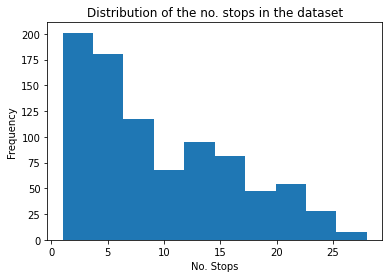

In [12]:
# Basic statistics on the number of stops and
# Distribution of number of stops in the dataset
helper.stop_sequence_statistics(df_analytics)

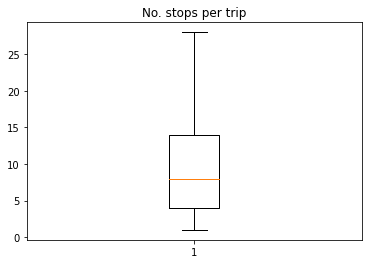

In [13]:
# Number of stops per trip
helper.boxplot_stop_sequence(df_analytics)

In [14]:
# For more precision of calculations we don't consider in the analysis the start stop 
# where speed, time , distance are all equal to 0
df_analytics.drop(df_analytics[(df_analytics['time_diff'] == 0) & 
                              (df_analytics['dist_diff'] == 0) &
                              (df_analytics['speed'] == 0)].index, inplace=True)

Mean of time difference : 331.69950738916253
--------------------------------------------------
Standard Deviation of time difference : 144.26160765228013
--------------------------------------------------
Skewness of time difference : 0.9503432323405213
--------------------------------------------------


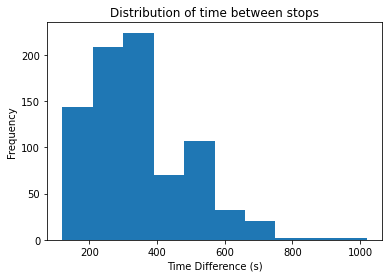

In [15]:
# Basic statistics for time
helper.time_statistics(df_analytics)

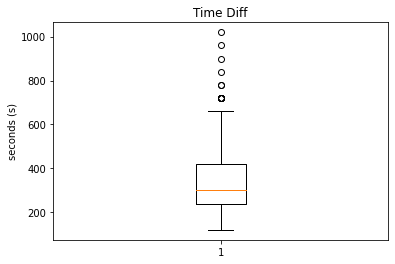

In [16]:
# Box plot on time difference
helper.boxplot_time(df_analytics)

Mean of distance difference : 4.834217832512316
--------------------------------------------------
Standard Deviation of distance difference : 2.360001012910759
--------------------------------------------------
Skewness of distance difference : 1.1698101491968338
--------------------------------------------------


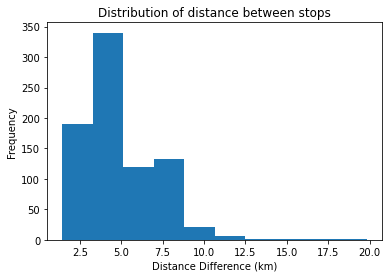

In [17]:
# Basic statistics for distance
helper.distance_statistics(df_analytics)

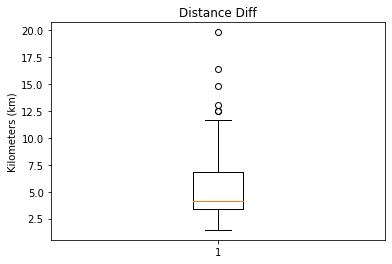

In [18]:
# Box plot on distance difference
helper.boxplot_distance(df_analytics)

Mean of speed : 53.411658766138665
--------------------------------------------------
Standard Deviation of speed : 14.01049651645494
--------------------------------------------------
Skewness of speed : 0.07364886833943464
--------------------------------------------------


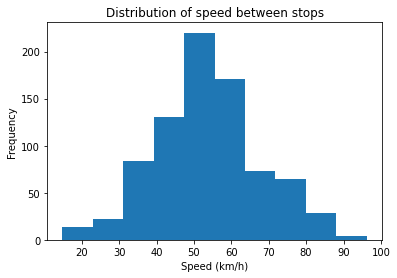

In [19]:
# Basic statistics for speed
helper.speed_statistics(df_analytics)

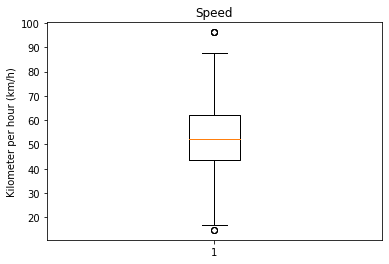

In [20]:
# Number of speed per trip
helper.boxplot_speed(df_analytics)

In [21]:
### TODO
    # Plot the spatial distribution of speed variable at each stop
### TODO
    # Quindi lista pezzetti di distanza fra una fermata e l'altra
    # Se distanza media in lista è intorno alla mean calcolata qui vuol dire che la maggior parte dei treni fa tutte o
    # quasi le fermate

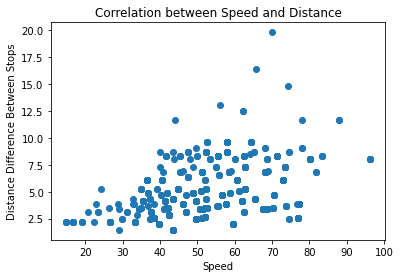

In [22]:
# Correlation between Speed and Distance
helper.scatter_speed_distance(df_analytics)

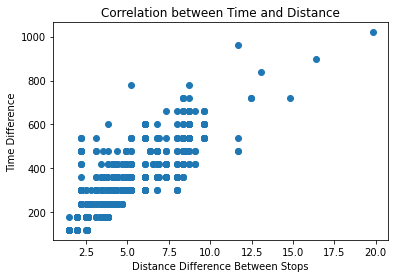

In [23]:
# Correlation between Time and Distance
helper.scatter_time_distance(df_analytics)

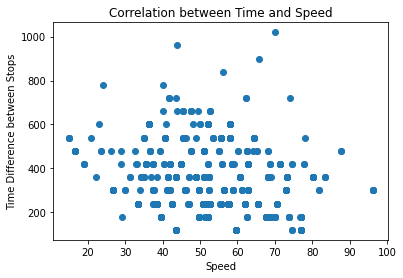

In [24]:
# Correlation between Time and Speed
helper.scatter_time_speed(df_analytics)

For each value:
    last_stop_sequence  value
0                    2      0
1                    3      0
2                    4      1
3                    5     19
4                    6      5
5                    7      2
6                    8      5
7                    9      1
8                   10      0
9                   11      1
10                  12      0
11                  13      4
12                  14      0
13                  15      3
14                  16      0
15                  17      1
16                  18      3
17                  19      0
18                  20      5
19                  21      2
20                  22      4
21                  23      1
22                  24      3
23                  25      2
24                  26      3
25                  27      1
26                  28      1
27                  29      0
--------------------------------------------------


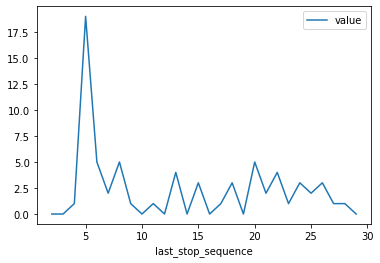

In [25]:
result = helper.plot_number_stops(df_analytics)

In [26]:
helper.aggregated_number_stops(result,3)

   last_stop_sequence  value
0              (0, 3]      0
1              (3, 6]     25
2              (6, 9]      8
3             (9, 12]      1
4            (12, 15]      7
5            (15, 18]      4
6            (18, 21]      7
7            (21, 24]      8
8            (24, 27]      6
9            (27, 30]      1
10           (30, 33]      0


/Users/gianlucarea/Desktop/Projects/conda-workspace/master-thesis/helper.py:137: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = result.groupby(pd.cut(result['last_stop_sequence'], np.arange(0, max_value + 5, input_value)))['value'].sum()


# Periodi ad alta intensità di traffico di treni con numerose fermate

# We choose the train between 07:00 and 10:00 
lower_time = '07:00:00'
higher_time = '10:00:00'
monday_stop_times = sw_stop_times.iloc[0:0]

sw_stop_times = sw_stop_times.loc[((sw_stop_times['arrival_time'] >= lower_time) &
                                  (sw_stop_times['arrival_time'] <= higher_time))| (
                                  (sw_stop_times['departure_time'] >= lower_time) &
                                  (sw_stop_times['departure_time'] <= higher_time))]

trips_between_bounds = list(dict.fromkeys(sw_stop_times['trip_id']))

sw_monday_trips = trips.iloc[0:0]

for trip_id in trips_between_bounds:
    temp_trips = monday_trips.loc[monday_trips['trip_id'] == trip_id]
    sw_monday_trips = pd.concat([sw_monday_trips, temp_trips], ignore_index = True)

In [27]:
# we return the dataset prior to the drop of the start point of each trip
df_analytics = df_analytics_save_copy.copy().reset_index(drop=True)

In [28]:
#We calculate the range of hours, but only using divider of 24 - 1,2,3,4,6,8,12
list_of_range_time = helper.calculate_list_of_range_times(2)
#We calculate the train based on the last stop during that period
result = helper.period_stop_based_data(df_analytics,list_of_range_time)
result.drop(result[(result['total_trains'] == 0)].index, inplace=True)
result.to_csv('result.csv')

the number of trains in transit during ['00:00:00', '02:00:00'] is 0
the number of trains in transit during ['02:00:00', '04:00:00'] is 0
the number of trains in transit during ['04:00:00', '06:00:00'] is 5
the number of trains in transit during ['06:00:00', '08:00:00'] is 12
the number of trains in transit during ['08:00:00', '10:00:00'] is 15
the number of trains in transit during ['10:00:00', '12:00:00'] is 11
the number of trains in transit during ['12:00:00', '14:00:00'] is 12
the number of trains in transit during ['14:00:00', '16:00:00'] is 14
the number of trains in transit during ['16:00:00', '18:00:00'] is 19
the number of trains in transit during ['18:00:00', '20:00:00'] is 15
the number of trains in transit during ['20:00:00', '22:00:00'] is 11
the number of trains in transit during ['22:00:00', '24:00:00'] is 5
[0, 0, 5, 12, 15, 11, 12, 14, 19, 15, 11, 5]


In [29]:
result.head(40)

,time_period_index,time_period,stop_sequence,total_trains
60,2,"[04:00:00, 06:00:00]",8,2
63,2,"[04:00:00, 06:00:00]",11,1
78,2,"[04:00:00, 06:00:00]",26,2
85,3,"[06:00:00, 08:00:00]",6,2
86,3,"[06:00:00, 08:00:00]",7,1
87,3,"[06:00:00, 08:00:00]",8,2
90,3,"[06:00:00, 08:00:00]",11,1
92,3,"[06:00:00, 08:00:00]",13,1
99,3,"[06:00:00, 08:00:00]",20,2
103,3,"[06:00:00, 08:00:00]",24,1
